## PREPROCESADO

In [1]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from imblearn.combine import SMOTETomek

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

/home/sanfermen/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df_churm = pd.read_csv("../ficheros/01-Churn_Modelling.csv", index_col= 0).reset_index(drop= True)
df_churm.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [3]:
df_churm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [4]:
# Hacemos una copia del df
df = df_churm.copy()

## Estandarizacion de nuestros datos

Cambiamos el tipo de dato a category para NumOfProducts, HasCrCard, IsActiveMember

In [5]:
df[["NumOfProducts", "HasCrCard", "IsActiveMember"]] = df[["NumOfProducts", "HasCrCard", "IsActiveMember"]].astype("category")

In [6]:
df.dtypes

CreditScore           int64
Geography            object
Gender               object
Age                   int64
Tenure                int64
Balance             float64
NumOfProducts      category
HasCrCard          category
IsActiveMember     category
EstimatedSalary     float64
Exited                int64
dtype: object

In [7]:
# Usamos el método StandardScaler
scaler = StandardScaler()

In [8]:
# Lo haremos solo para las variables numéricas menos las predictoras
num = df.select_dtypes(include=np.number).drop(columns=["Exited"], axis=1)
num.head()

,CreditScore,Age,Tenure,Balance,EstimatedSalary
0,619,42,2,0.00,101348.88
1,608,41,1,83807.86,112542.58
2,502,42,8,159660.80,113931.57
3,699,39,1,0.00,93826.63
4,850,43,2,125510.82,79084.10


In [9]:
# Vamos a ajustar nuestros datos
scaler.fit(num)

# transformamos los datos
X_escaladas = scaler.transform(num)

# por último convertiremos el array que nos devuelve en un dataframe. 
num_escaladas = pd.DataFrame(X_escaladas, columns = num.columns)
num_escaladas.head(2)

,CreditScore,Age,Tenure,Balance,EstimatedSalary
0,-0.332983,0.490105,-1.041760,-1.225848,0.021886
1,-0.447572,0.374424,-1.387538,0.117350,0.216534


In [10]:
# eliminamos del original las columnas sin estandarizar
colum = num.columns
df.drop(columns= colum, axis = 1, inplace=True)
df.head()

,Geography,Gender,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,France,Female,1,1,1,1
1,Spain,Female,1,0,1,0
2,France,Female,3,1,0,1
3,France,Female,2,0,0,0
4,Spain,Female,1,1,1,0


In [11]:
# Unimos el df de las numéricas escaladas con el resto de las variables
df = pd.concat([df, num_escaladas], axis = 1)
df.head()

,Geography,Gender,NumOfProducts,HasCrCard,IsActiveMember,Exited,CreditScore,Age,Tenure,Balance,EstimatedSalary
0,France,Female,1,1,1,1,-0.332983,0.490105,-1.041760,-1.225848,0.021886
1,Spain,Female,1,0,1,0,-0.447572,0.374424,-1.387538,0.117350,0.216534
2,France,Female,3,1,0,1,-1.551792,0.490105,1.032908,1.333053,0.240687
3,France,Female,2,0,0,0,0.500391,0.143063,-1.387538,-1.225848,-0.108918
4,Spain,Female,1,1,1,0,2.073384,0.605786,-1.041760,0.785728,-0.365276


## ENCODING

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Geography        10000 non-null  object  
 1   Gender           10000 non-null  object  
 2   NumOfProducts    10000 non-null  category
 3   HasCrCard        10000 non-null  category
 4   IsActiveMember   10000 non-null  category
 5   Exited           10000 non-null  int64   
 6   CreditScore      10000 non-null  float64 
 7   Age              10000 non-null  float64 
 8   Tenure           10000 non-null  float64 
 9   Balance          10000 non-null  float64 
 10  EstimatedSalary  10000 non-null  float64 
dtypes: category(3), float64(5), int64(1), object(2)
memory usage: 654.9+ KB


Vamos a usar get_dummies para hacer el encoding de **Geography** y **Gender**, ya que no tienen orden

In [13]:
# Creamos una lista de columnas con las 2 que vamos a hacer el encoding
lista_columnas = ["Geography", "Gender"]
# Creamos un dataframe vacío para añadir después las columnas que creemos
df_encoded = pd.DataFrame()
# Iteramos por la lista de columnas
for columna in lista_columnas:
    # Pasamos la función get_dummies por las columnas
    df_dummies = pd.get_dummies(df[columna], prefix_sep = "_", prefix = columna, dtype = int)
    # Unimos el df creado al vacío
    df_encoded = pd.concat([df_encoded, df_dummies], axis = 1)

In [14]:
df_encoded.head()

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,0,0,1,0
1,0,0,1,1,0
2,1,0,0,1,0
3,1,0,0,1,0
4,0,0,1,1,0


In [15]:
# Unimos el df con el original y eliminamos las columnas sin hacer el encoding
df_final = pd.concat([df, df_encoded], axis=1)
df_final.drop(lista_columnas, axis = 1, inplace = True)
df_final.head(2)

,NumOfProducts,HasCrCard,IsActiveMember,Exited,CreditScore,Age,Tenure,Balance,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,1,1,1,-0.332983,0.490105,-1.041760,-1.225848,0.021886,1,0,0,1,0
1,1,0,1,0,-0.447572,0.374424,-1.387538,0.117350,0.216534,0,0,1,1,0


In [16]:
df_final.dtypes

NumOfProducts        category
HasCrCard            category
IsActiveMember       category
Exited                  int64
CreditScore           float64
Age                   float64
Tenure                float64
Balance               float64
EstimatedSalary       float64
Geography_France        int64
Geography_Germany       int64
Geography_Spain         int64
Gender_Female           int64
Gender_Male             int64
dtype: object

In [17]:
df_final[["NumOfProducts","HasCrCard","IsActiveMember"]] = df_final[["NumOfProducts","HasCrCard","IsActiveMember"]].apply(pd.to_numeric)

In [18]:
df_final.dtypes

NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
Exited                 int64
CreditScore          float64
Age                  float64
Tenure               float64
Balance              float64
EstimatedSalary      float64
Geography_France       int64
Geography_Germany      int64
Geography_Spain        int64
Gender_Female          int64
Gender_Male            int64
dtype: object

## Codificacion sin estandarizar

Realizamos el encoding ahora para el df sin estandarizar, para tener los dos guardados

In [19]:
df_churm.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [20]:
df_encoded.head(2)

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,0,0,1,0
1,0,0,1,1,0


In [21]:
# Unimos el df con el original sin estandarizar y eliminamos las columnas sin hacer el encoding
df_final_sinestan = pd.concat([df_churm, df_encoded], axis=1)
df_final_sinestan.drop(lista_columnas, axis = 1, inplace = True)
df_final_sinestan.head(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0


In [22]:
df_final_sinestan.dtypes

CreditScore            int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       int64
Geography_Germany      int64
Geography_Spain        int64
Gender_Female          int64
Gender_Male            int64
dtype: object

## DESBALANCEO DE LA VARIABLE RESPUESTA

Tenemos un 80/20 de proporción. Usaremos el método SMOTETomek, que genera nuevos registros basándose en vecinos de la clase minoritaria, por lo que genera nuevos registros similares, pero no iguales

In [23]:
# para aplicar este método lo primero que tenemos que hacer es separar en X e y
y = df_final['Exited']
X = df_final.drop('Exited', axis=1)

# dividimos en sets de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [24]:
# iniciamos el método
os_us = SMOTETomek()

# ajustamos el modelo
X_train_res, y_train_res = os_us.fit_resample(X_train, y_train)

In [25]:
# Numero de datos antes
y_train.value_counts()

0    5591
1    1409
Name: Exited, dtype: int64

In [26]:
# Proporción después
y_train_res.value_counts()

0    5544
1    5544
Name: Exited, dtype: int64

In [27]:
df_balanceado = pd.concat([X_train_res, y_train_res], axis=1)
df_balanceado.head()

,NumOfProducts,HasCrCard,IsActiveMember,CreditScore,Age,Tenure,Balance,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Exited
0,1,0,1,0.437888,-1.129427,-1.387538,1.099988,-0.388607,0,0,1,0,1,0
1,1,1,1,2.073384,-0.666704,-0.350204,-1.225848,1.400367,1,0,0,0,1,0
2,1,1,1,1.115004,1.531233,1.032908,0.083735,0.285698,1,0,0,0,1,0
3,1,1,1,-1.624712,-0.435342,1.378686,0.651894,0.277859,0,1,0,1,0,1
4,1,0,0,0.864992,-0.088299,-1.041760,0.864166,-1.139701,0,0,1,1,0,0


In [28]:
df_balanceado.isnull().sum()

NumOfProducts        0
HasCrCard            0
IsActiveMember       0
CreditScore          0
Age                  0
Tenure               0
Balance              0
EstimatedSalary      0
Geography_France     0
Geography_Germany    0
Geography_Spain      0
Gender_Female        0
Gender_Male          0
Exited               0
dtype: int64

In [29]:
df_balanceado.duplicated().sum()

0

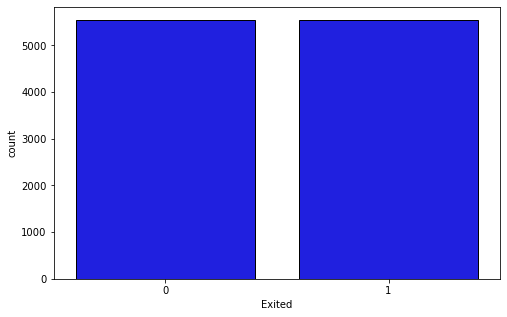

In [30]:
# Vemos graficamente cómo será ahora la distibución de las variables
plt.figure(figsize=(8,5)) # para cambiar el tamaño de la figura

fig1 = sns.countplot(data = df_balanceado, x = "Exited",  color = "blue",  edgecolor='black')
fig1.set(xticklabels=["0", "1"]) 
plt.show()

In [67]:
# para aplicar este método lo primero que tenemos que hacer es separar en X e y
y2 = df_final_sinestan['Exited']
X2 = df_final_sinestan.drop('Exited', axis=1)

# dividimos en sets de entrenamiento y test
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, train_size=0.7)

In [68]:
# iniciamos el método
os_us2 = SMOTETomek()
# ajustamos el modelo
X2_train_res, y2_train_res = os_us2.fit_resample(X2_train, y2_train)

In [69]:
# Numero de datos antes
y2_train.value_counts()

0    5581
1    1419
Name: Exited, dtype: int64

In [70]:
# Proporción después
y2_train_res.value_counts()

0    4771
1    4771
Name: Exited, dtype: int64

In [71]:
df_balan_sinestand = pd.concat([X2_train_res, y2_train_res], axis=1)
df_balan_sinestand.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Exited
0,775,29,10,0.00,2,1,1,68143.93,0,0,1,0,1,0
1,647,26,8,109958.15,1,1,1,136592.24,0,0,1,1,0,1
2,576,41,4,112609.91,1,0,0,191035.18,1,0,0,1,0,1
3,624,38,7,123906.55,1,1,0,135096.78,0,0,1,0,1,0
4,599,39,4,0.00,1,1,0,194273.20,0,0,1,1,0,1


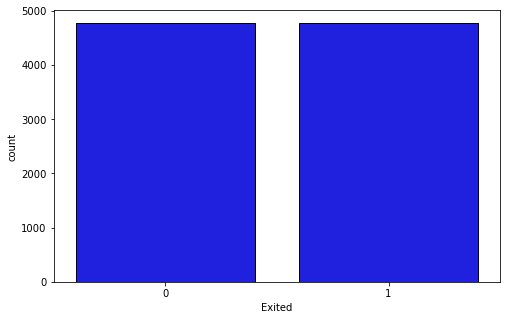

In [73]:
plt.figure(figsize=(8,5)) # para cambiar el tamaño de la figura

fig1 = sns.countplot(data = df_balan_sinestand, x = "Exited",  color = "blue",  edgecolor='black')
fig1.set(xticklabels=["0", "1"]) 
plt.show()

In [72]:
df_final.to_csv("../ficheros/02-Churm_estand_encod.csv")
df_final_sinestan.to_csv("../ficheros/03-Churm_encoding.csv")
df_balanceado.to_csv("../ficheros/04-Churm_balan_estan.csv")
df_balan_sinestand.to_csv("../ficheros/05-Churm_balan_sinest.csv")